# Dip Ass # 05

# Task#01 (Simple Gradient Method)

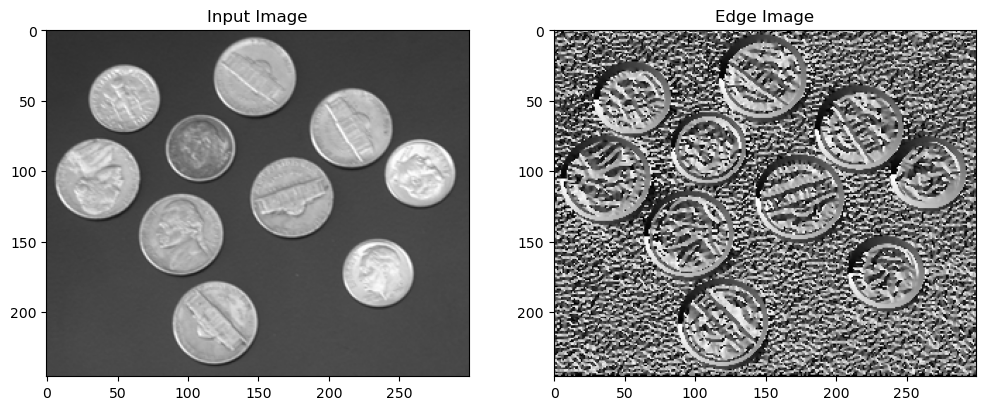

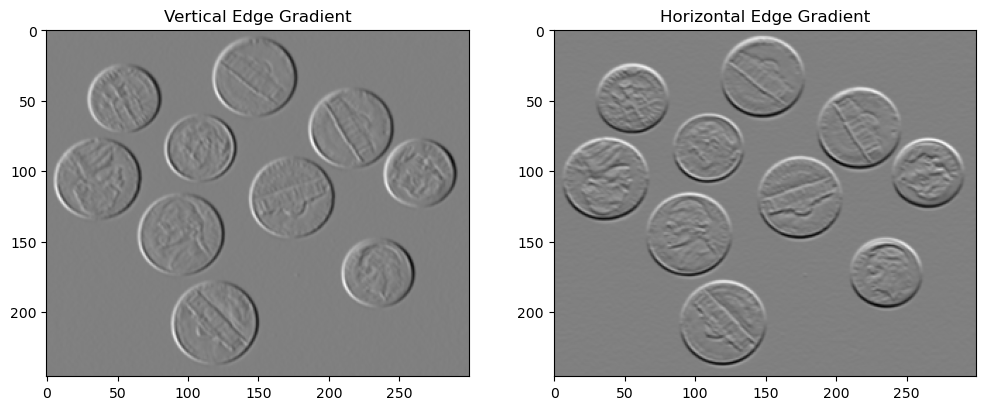

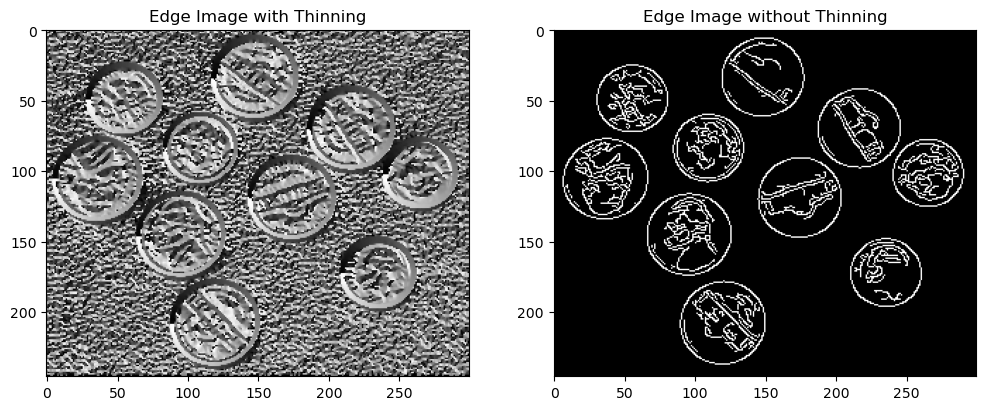

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the input image
img = cv2.imread("coins.png")

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blur = cv2.GaussianBlur(gray, (0,0), 0.5)

# Detect edges using Sobel operator
sobelx = cv2.Sobel(blur, cv2.CV_32F, 1, 0, ksize=3)
sobely = cv2.Sobel(blur, cv2.CV_32F, 0, 1, ksize=3)
mag, imgEdge = cv2.cartToPolar(sobelx, sobely, angleInDegrees=False)
threshOut = 0.0955

# Apply custom threshold
imgEdgeCustom = np.uint8(imgEdge > 0.19)

# Show the input image and edge detection result
fig, axs = plt.subplots(1, 2, figsize=(12, 8))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Input Image')
axs[1].imshow(imgEdge, cmap='gray')
axs[1].set_title('Edge Image')
plt.show()

# Show the gradient images
vertEdgeGrad = sobelx
horzEdgeGrad = sobely
fig, axs = plt.subplots(1, 2, figsize=(12, 8))
axs[0].imshow(vertEdgeGrad, cmap='gray', vmin=-np.amax(vertEdgeGrad), vmax=np.amax(vertEdgeGrad))
axs[0].set_title('Vertical Edge Gradient')
axs[1].imshow(horzEdgeGrad, cmap='gray', vmin=-np.amax(horzEdgeGrad), vmax=np.amax(horzEdgeGrad))
axs[1].set_title('Horizontal Edge Gradient')
plt.show()

# Show the edge detection result without thinning
imgEdgeNoThinning = cv2.Canny(blur, 50, 150, L2gradient=True)
fig, axs = plt.subplots(1, 2, figsize=(12, 8))
axs[0].imshow(imgEdge, cmap='gray')
axs[0].set_title('Edge Image with Thinning')
axs[1].imshow(imgEdgeNoThinning, cmap='gray')
axs[1].set_title('Edge Image without Thinning')
plt.show()


# Task#02(Advance Grdaient Methods)

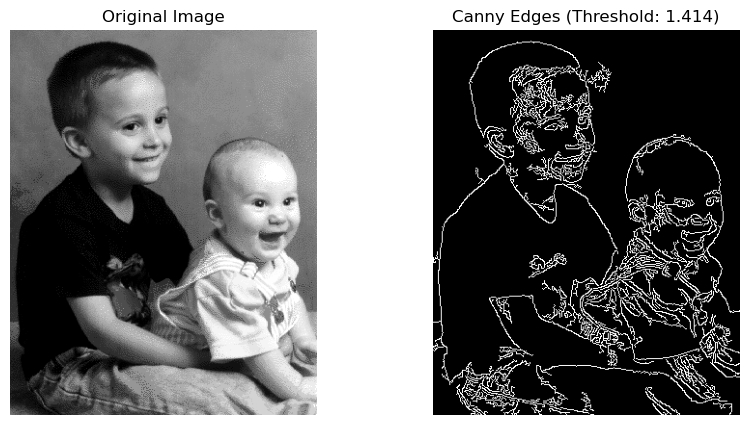

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
imgAdv = cv2.imread("kids.tif", cv2.IMREAD_GRAYSCALE)

# Apply Canny edge detection
imgAdvEdge = cv2.Canny(imgAdv, 0, 255, apertureSize=3)

# Display the original image and its edges
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imgAdv, cmap="gray")
plt.title("Original Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(imgAdvEdge, cmap="gray")
plt.title("Canny Edges (Threshold: 1.414)")
plt.axis("off")
plt.show()


# Task#03(Advanced Gradient Methods)Detecting Crack Edges

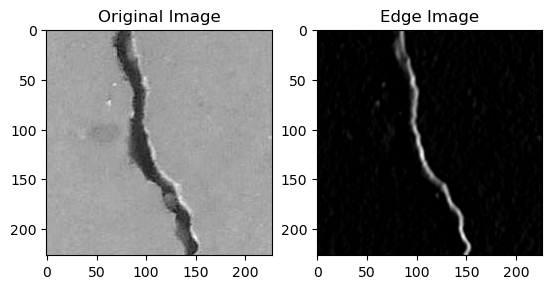

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

imgCrack = cv2.imread('00001.jpg')
imgCrack = cv2.cvtColor(imgCrack, cv2.COLOR_BGR2GRAY)

imgFiltCrack = cv2.GaussianBlur(imgCrack, (0, 0), 1.5)
imgEdgeCrack = cv2.Sobel(imgFiltCrack, -1, 1, 0)

plt.subplot(1, 2, 1)
plt.imshow(imgCrack, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(imgEdgeCrack, cmap='gray')
plt.title('Edge Image')

plt.show()


# Task#03(Advanced Gradient Methods)The imfindcircles and viscircles functions

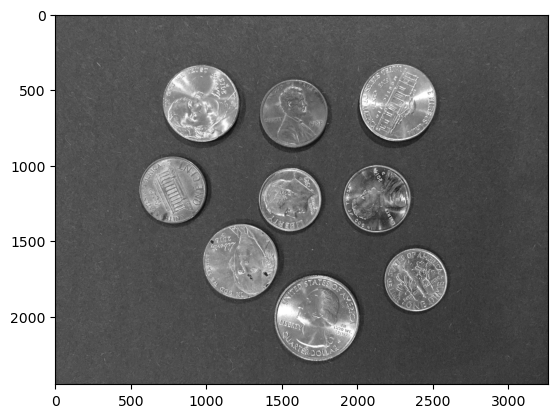

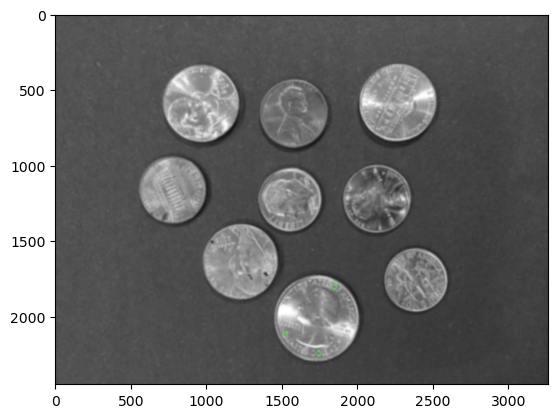

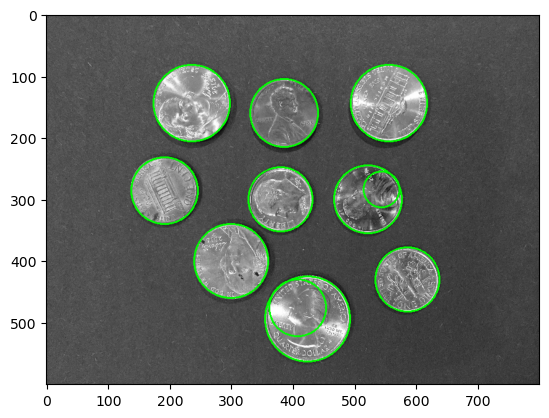

In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image and convert it to grayscale
imgCirc = cv2.imread("coins3.jpg")
gray_imgCirc = cv2.cvtColor(imgCirc, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.imshow(gray_imgCirc, cmap='gray')
plt.show()

# Set the lower and upper bounds for circle detection
lowerBound = 10
upperBound = 20

# Apply Gaussian smoothing to the image
imgCirc = cv2.GaussianBlur(imgCirc, (0, 0), 5)

# Find circles using Hough transform
circles = cv2.HoughCircles(gray_imgCirc, cv2.HOUGH_GRADIENT, 1, 20,
                           param1=50, param2=30, minRadius=lowerBound, maxRadius=upperBound)

# Draw the detected circles on the image
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(imgCirc, (x, y), r, (0, 255, 0), 2)

# Display the image with detected circles
plt.imshow(cv2.cvtColor(imgCirc, cv2.COLOR_BGR2RGB))
plt.show()

# Resize the image and apply Gaussian smoothing
imgCirc = cv2.imread("coins3.jpg")
resized_imgCirc = cv2.resize(imgCirc, (800, 600))
resized_gray_imgCirc = cv2.cvtColor(resized_imgCirc, cv2.COLOR_BGR2GRAY)
resized_gray_imgCirc = cv2.GaussianBlur(resized_gray_imgCirc, (0, 0), 3)

# Find circles using Hough transform with new bounds
circles = cv2.HoughCircles(resized_gray_imgCirc, cv2.HOUGH_GRADIENT, 1, 20,
                           param1=50, param2=30, minRadius=10, maxRadius=100)

# Draw the detected circles on the resized image
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(resized_imgCirc, (x, y), r, (0, 255, 0), 2)

# Display the resized image with detected circles
plt.imshow(cv2.cvtColor(resized_imgCirc, cv2.COLOR_BGR2RGB))
plt.show()
